# Heart Disease Classification with Machine Learning  

**Predicting heart disease using logistic regression and evaluation metrics**  

This notebook explores the **Heart Disease dataset** and applies machine learning models  
to classify whether a patient has heart disease.  
We follow a structured pipeline: data collection, preprocessing, model training, evaluation, and reflection.  


## 0. Import Libraries  

**Load essential Python libraries**  

We begin by importing the libraries required for data handling, visualization,  
and machine learning.  

- `numpy` and `pandas` for data processing,  
- `matplotlib` and `seaborn` for visualization,  
- `scikit-learn` for model training, scaling, and evaluation metrics.  

This ensures the environment is ready for the next steps.

In [1]:
# ==== INSTALL ALL REQUIRED PACKAGES (SUPERVISED PIPELINE) ====
# Run this cell once to install everything needed for the logistic regression notebook.
# If already installed, pip will just confirm the versions.

!pip install numpy pandas matplotlib seaborn scikit-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

## 1. Data Collection  

**Load the Heart Disease dataset into a DataFrame**  

We import the dataset from CSV into a Pandas DataFrame (`df`)  
to begin exploration and preprocessing.  

Steps performed:  
- Read the dataset from the specified file path,  
- Store it in a DataFrame,  
- Print the first few rows to confirm the structure. 

In [3]:
df = pd.read_csv("Hearth_Dataset.csv")
print(df)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

## 2. Visualization  

### 2.1 Target Distribution Balance  

**Check the balance of the target variable (heart disease vs no heart disease)**  

This chart illustrates how patients are distributed across the two outcome classes.  

**What we see:**  
- Patients **without heart disease** ≈ 160 (53%),  
- Patients **with heart disease** ≈ 140 (47%).  

**Insights:**  
The dataset is fairly balanced between positive and negative cases.  
This balance means we can train predictive models without applying  
heavy rebalancing techniques such as class weights or resampling.  


C:\Users\magnu\AppData\Local\Temp\ipykernel_41148\138637620.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


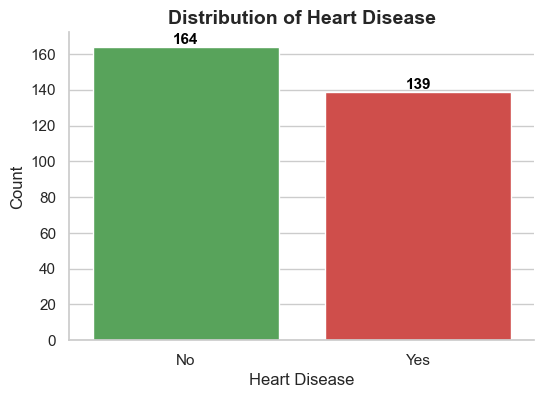

In [4]:
sns.set(style="whitegrid", context="notebook")

custom_colors = {"No": "#4CAF50", "Yes": "#E53935"}

sns.set_style("whitegrid")

plt.figure(figsize=(6,4))
ax = sns.countplot(
    x="AHD", 
    data=df, 
    palette=custom_colors
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',                               # Value text
        (p.get_x() + p.get_width() / 2., p.get_height()),       # Position on bar
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='black'
    )

plt.title("Distribution of Heart Disease", fontsize=14, weight="bold")
plt.xlabel("Heart Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
sns.despine()
plt.show()

### 2.2 Heart Disease by Gender  

**Explore the distribution of heart disease across male and female patients**  

**What we see:**  
- **Males (Sex = 1):** majority of the dataset, with slightly more cases of heart disease than no disease,  
- **Females (Sex = 0):** smaller group overall, with fewer heart disease cases.  

**Insights:**  
Heart disease appears more common among males than females in this dataset.  
However, since females are underrepresented, gender-related patterns must be interpreted cautiously.  


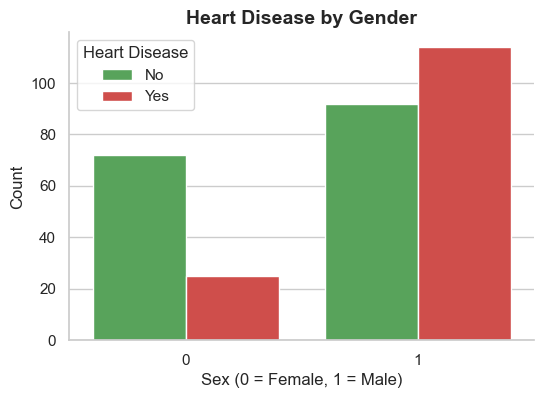

In [5]:
custom_colors = {"No": "#4CAF50", "Yes": "#E53935"}

plt.figure(figsize=(6,4))
ax = sns.countplot(
    x="Sex",
    hue="AHD",
    data=df,
    palette=custom_colors
)

plt.title("Heart Disease by Gender", fontsize=14, weight="bold")
plt.xlabel("Sex (0 = Female, 1 = Male)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Heart Disease")
sns.despine()
plt.show()

### 2.3 Chest Pain Type vs Heart Disease  

**Examine the relationship between chest pain categories and heart disease**  

**What we see:**  
- Patients with **asymptomatic chest pain** have a significantly higher heart disease rate,  
- Patients with **typical angina** and **nonanginal pain** show fewer heart disease cases,  
- **Nontypical angina** presents a mixed distribution.  

**Insights:**  
Chest pain type is a strong predictor of heart disease.  
Patients reporting **asymptomatic pain** are far more likely to have heart disease,  
making this feature critical for both exploratory analysis and predictive modeling.  


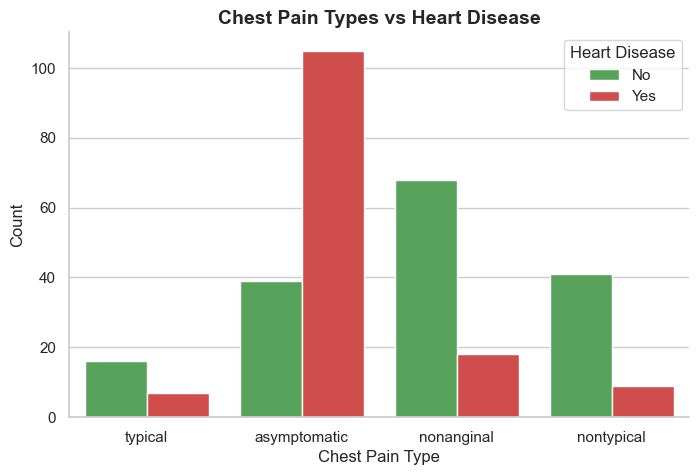

In [6]:
custom_palette = {"No": "#4CAF50", "Yes": "#E53935"}  # Green & warm red

plt.figure(figsize=(8,5))
sns.countplot(x="ChestPain", hue="AHD", data=df, palette=custom_palette)

plt.title("Chest Pain Types vs Heart Disease", fontsize=14, weight="bold")
plt.xlabel("Chest Pain Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Heart Disease")
sns.despine()
plt.show()

### 2.4 Age vs Max Heart Rate by Heart Disease  

**Analyze the relationship between patient age, maximum heart rate, and disease status**  

**What we see:**  
- The scatter plot shows how **Age** relates to **MaxHR**, split by heart disease presence,  
- A **risk zone** is highlighted below MaxHR = 142 bpm (median for heart disease patients).  

**Insights:**  
- Patients with **lower MaxHR (<142 bpm)** are more likely to have heart disease,  
- Above 142 bpm, cases are more evenly distributed,  
- MaxHR alone is not a strong predictor and should be combined with other features  
  such as **Chest Pain, Oldpeak, and Ca** to improve predictive accuracy.  


In [7]:
risk_threshold = df[df["AHD"] == "Yes"]["MaxHR"].median()
print(f"Calculated Risk Threshold: {risk_threshold:.0f} bpm")

Calculated Risk Threshold: 142 bpm


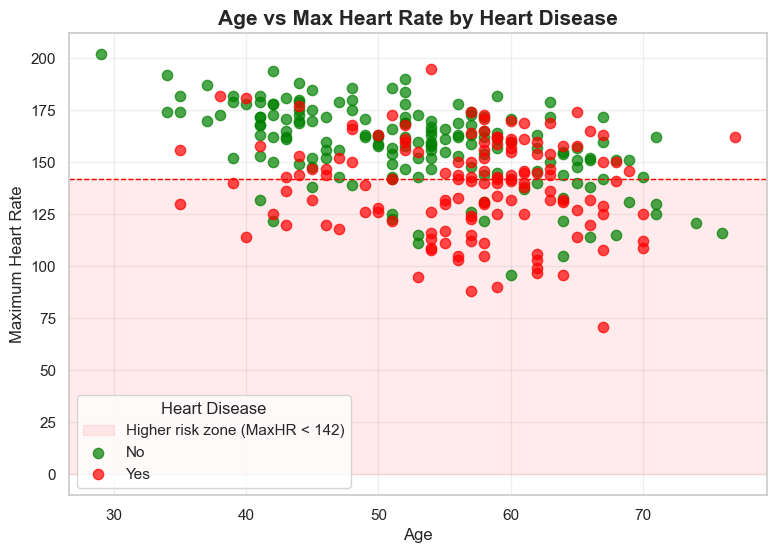

In [8]:
risk_threshold = 142

plt.figure(figsize=(9,6))
plt.axhspan(0, risk_threshold, color="red", alpha=0.08, label=f"Higher risk zone (MaxHR < {risk_threshold})")
plt.axhline(risk_threshold, color="red", linestyle="--", linewidth=1)

plt.scatter(df[df["AHD"]=="No"]["Age"], df[df["AHD"]=="No"]["MaxHR"], 
            color="green", alpha=0.7, s=55, label="No")
plt.scatter(df[df["AHD"]=="Yes"]["Age"], df[df["AHD"]=="Yes"]["MaxHR"], 
            color="red", alpha=0.7, s=55, label="Yes")

plt.title("Age vs Max Heart Rate by Heart Disease", fontsize=15, weight="bold")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.legend(title="Heart Disease")
plt.grid(alpha=0.3)
plt.show()

### 2.5 Resting Blood Pressure vs Heart Disease  

**Examine the impact of RestBP on heart disease occurrence**  

**What we see:**  
- The **median RestBP** is 130 mmHg for both groups (with and without heart disease),  
- Patients with heart disease show a slightly **wider spread** of values,  
- Several **outliers above 170 mmHg** appear in both groups.  

**Insights:**  
Resting blood pressure does not seem to be a strong standalone predictor of heart disease.  
While high RestBP is present in some patients with AHD, many without the condition  
also fall into the same range.  

This suggests RestBP is better interpreted **in combination with other features**  
such as **Oldpeak, Chest Pain, and MaxHR**, rather than used on its own.  


C:\Users\magnu\AppData\Local\Temp\ipykernel_41148\2239617177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AHD", y="RestBP", data=df, palette={"No": "green", "Yes": "red"})


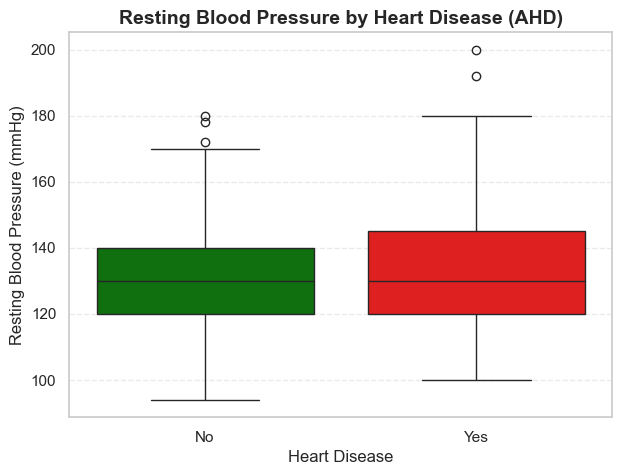

AHD
No     130.0
Yes    130.0
Name: RestBP, dtype: float64

In [9]:
plt.figure(figsize=(7,5))
sns.boxplot(x="AHD", y="RestBP", data=df, palette={"No": "green", "Yes": "red"})

plt.title("Resting Blood Pressure by Heart Disease (AHD)", fontsize=14, weight="bold")
plt.xlabel("Heart Disease")
plt.ylabel("Resting Blood Pressure (mmHg)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

df.groupby("AHD")["RestBP"].median()

### 2.6 Cholesterol Levels vs Heart Disease  

**Assess cholesterol as a predictor of heart disease**  

**What we see:**  
- Median cholesterol is slightly higher in patients with heart disease (**249 mg/dL**)  
  compared to those without (**234.5 mg/dL**),  
- There is **significant overlap** between groups — many patients with high cholesterol do not have heart disease, and vice versa,  
- Several **extreme outliers (>400 mg/dL)** appear, mostly among patients without heart disease.  

**Insights:**  
Cholesterol levels are marginally higher in heart disease patients,  
but they are not a strong standalone predictor in this dataset.  

While cholesterol contributes to cardiovascular risk,  
other features such as **Chest Pain, Oldpeak, and Ca** are likely more influential.  
Cholesterol becomes more meaningful when **combined with other features**  
rather than used in isolation.  


C:\Users\magnu\AppData\Local\Temp\ipykernel_41148\3867222156.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AHD", y="Chol", data=df, palette={"No": "green", "Yes": "red"})


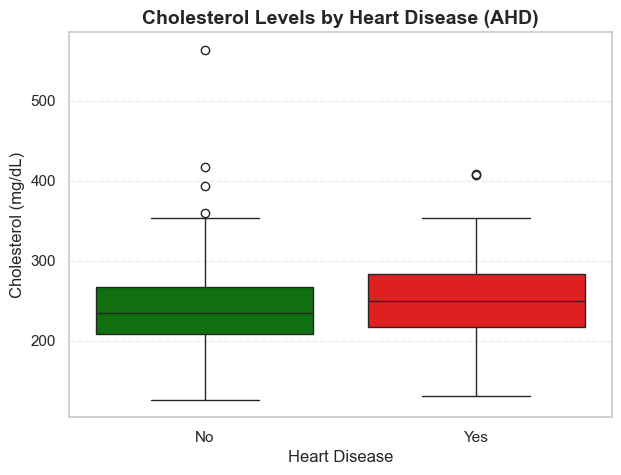

AHD
No     234.5
Yes    249.0
Name: Chol, dtype: float64

In [10]:
plt.figure(figsize=(7,5))
sns.boxplot(x="AHD", y="Chol", data=df, palette={"No": "green", "Yes": "red"})

plt.title("Cholesterol Levels by Heart Disease (AHD)", fontsize=14, weight="bold")
plt.xlabel("Heart Disease")
plt.ylabel("Cholesterol (mg/dL)")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

df.groupby("AHD")["Chol"].median()

### 2.7 Exercise-Induced Angina vs Heart Disease  

**Analyze the relationship between exercise-induced angina (ExAng) and heart disease**  

**What we see:**  
- **Patients with heart disease (AHD = Yes):**  
  - 55% experience angina during exercise (ExAng = 1),  
  - 45% do not.  
- **Patients without heart disease (AHD = No):**  
  - 86% report no angina (ExAng = 0),  
  - 14% experience angina despite being healthy.  

**Insights:**  
Exercise-induced angina is much more common among patients with heart disease (55%)  
compared to those without (14%).  
However, nearly half of AHD-positive patients do not experience angina,  
showing that **symptoms alone are insufficient for reliable diagnosis**.  


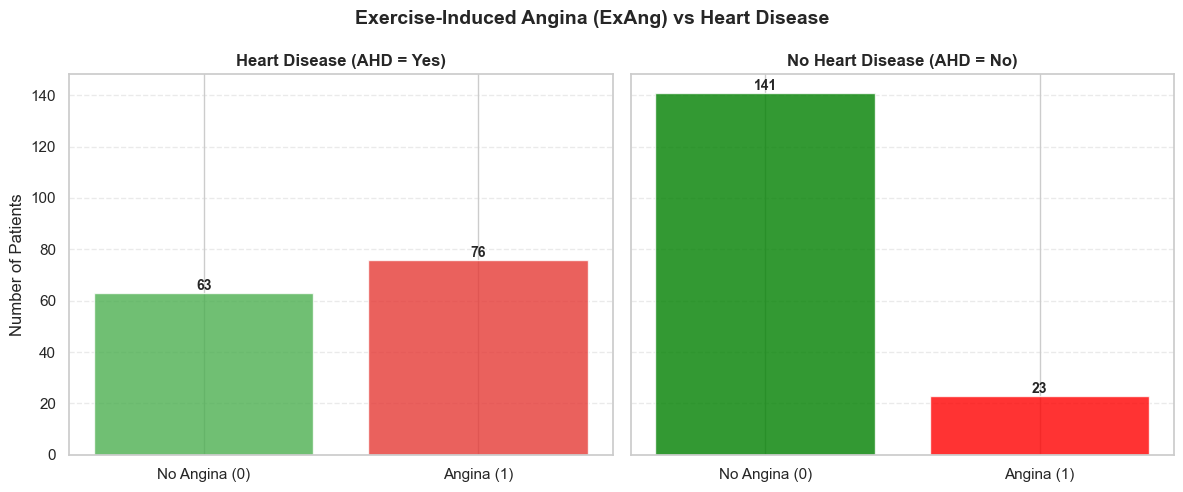

In [11]:
ahd_yes = df[df["AHD"] == "Yes"]
ahd_no = df[df["AHD"] == "No"]

yes_counts = ahd_yes["ExAng"].value_counts().sort_index()
no_counts = ahd_no["ExAng"].value_counts().sort_index()

labels = ["No Angina (0)", "Angina (1)"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

bars1 = axes[0].bar(labels, yes_counts, color=["#4CAF50", "#E53935"], alpha=0.8)
axes[0].set_title("Heart Disease (AHD = Yes)", fontsize=12, weight="bold")
axes[0].set_ylabel("Number of Patients")
axes[0].grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars1:
    axes[0].text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 1, 
        f"{int(bar.get_height())}", 
        ha="center", fontsize=10, fontweight="bold"
    )

bars2 = axes[1].bar(labels, no_counts, color=["green", "red"], alpha=0.8)
axes[1].set_title("No Heart Disease (AHD = No)", fontsize=12, weight="bold")
axes[1].grid(axis="y", linestyle="--", alpha=0.4)

for bar in bars2:
    axes[1].text(
        bar.get_x() + bar.get_width()/2, 
        bar.get_height() + 1, 
        f"{int(bar.get_height())}", 
        ha="center", fontsize=10, fontweight="bold"
    )

fig.suptitle("Exercise-Induced Angina (ExAng) vs Heart Disease", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()

### 2.8 Heart Disease by Oldpeak Risk Zones  

**Assess heart disease risk across Oldpeak levels (ST depression)**  

**What we see:**  
- **Low Risk (Oldpeak = 0):** 74% No, 26% Yes,  
- **Medium Risk (0.1–1.5):** 59% No, 41% Yes,  
- **High Risk (>1.5):** 25% No, 75% Yes.  

**Insights:**  
Heart disease risk increases sharply with higher Oldpeak values:  
- **Low Oldpeak:** relatively low risk, but 26% silent cases remain,  
- **Medium Oldpeak:** moderate risk, with 41% AHD prevalence,  
- **High Oldpeak:** very high risk, with 75% of patients showing AHD.  

Oldpeak is a **strong standalone predictor**,  
but combining it with **ExAng** and **Slope** provides better accuracy  
by capturing more complete exercise-induced stress patterns.  


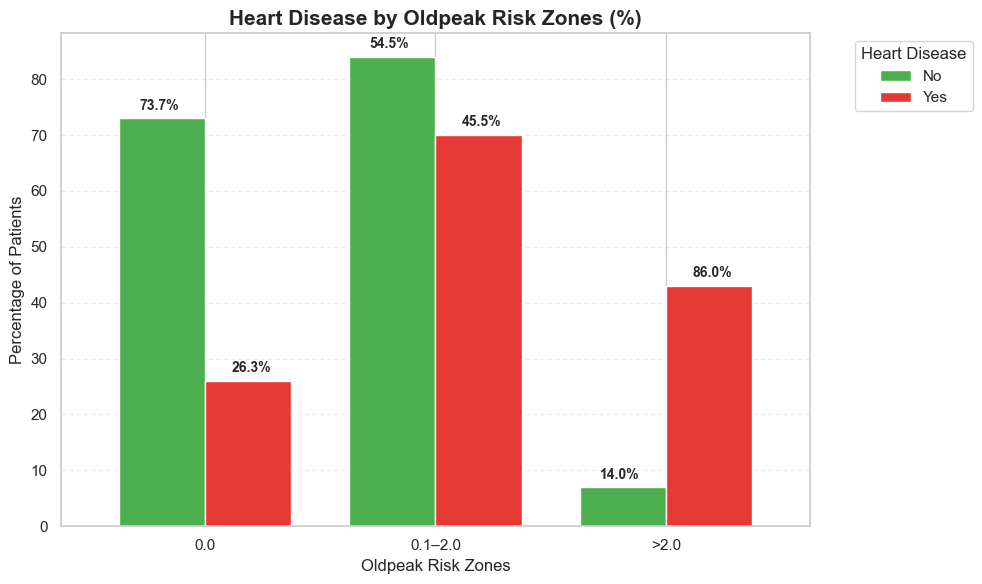

In [12]:
bins = [-float("inf"), 0.0, 2.0, float("inf")]
labels = ["0.0", "0.1–2.0", ">2.0"]

oldpeak_groups = pd.cut(df["Oldpeak"], bins=bins, labels=labels, right=True)
oldpeak_counts = pd.crosstab(oldpeak_groups, df["AHD"])
oldpeak_totals = oldpeak_counts.sum(axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
palette = {"No": "#4CAF50", "Yes": "#E53935"}

oldpeak_counts.plot(
    kind="bar",
    color=[palette[c] for c in oldpeak_counts.columns],
    width=0.75,
    ax=ax
)

n_series = oldpeak_counts.shape[1]
bar_width = 0.8 / n_series
for i, grp in enumerate(oldpeak_counts.index):
    total = oldpeak_totals.loc[grp]
    for j, cls in enumerate(oldpeak_counts.columns):
        count = oldpeak_counts.loc[grp, cls]
        pct = (count / total * 100) if total else 0.0
        x = (i - 0.4) + j * bar_width + bar_width / 2
        ax.text(x, count + 1, f"{pct:.1f}%", ha="center", va="bottom",
                fontsize=10, fontweight="bold")

ax.set_title("Heart Disease by Oldpeak Risk Zones (%)", fontsize=15, weight="bold")
ax.set_xlabel("Oldpeak Risk Zones")
ax.set_ylabel("Percentage of Patients")
ax.set_xticklabels(oldpeak_counts.index, rotation=0)
ax.grid(axis="y", linestyle="--", alpha=0.4)
ax.legend(title="Heart Disease", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## 3. Feature Selection  

**Refine dataset by removing irrelevant or redundant features**  

We prepare the dataset for modeling by applying thresholds and dropping unnecessary columns

In [13]:
TARGET = "AHD"                   
VAR_THRESHOLD = 0.10            
CORR_THRESHOLD = 0.80  

### 3.1 Drop Unnamed Column  

**Remove non-informative column from dataset**  

The CSV import created an extra **Unnamed column**,  
which does not contain useful information for analysis.  

**Action:**  
- Identify all columns starting with `"Unnamed"`,  
- Drop them from the DataFrame.  

**Result:**  
The dataset is cleaner and free of irrelevant columns,  
ensuring only meaningful features remain for further selection steps.  



In [14]:
id_like = [c for c in df.columns if c.lower().startswith("unnamed")]
df = df.drop(columns=id_like, errors="ignore")

In [15]:
df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


### 3.2 Split Target and Features  

**Separate the label (AHD) from the input features**  

We define the target variable and separate it from the predictors to prepare for encoding and scaling.  

**Steps performed:**  
- Set **`y` = AHD** (binary outcome: heart disease vs no heart disease),  
- Create **`X_raw`** by dropping the target column,  
- Inspect the first rows of `X_raw` before encoding categorical features.  

**Result:**  
- `y` contains the classification labels,  
- `X_raw` contains all predictor variables (e.g., Age, Sex, ChestPain, RestBP, Chol, Fbs, etc.).  



In [16]:
y = df[TARGET]
X_raw = df.drop(columns={TARGET})

In [17]:
print("Before Encoding (X_raw):")
display(X_raw.head(5))

Before Encoding (X_raw):


,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal


### 3.3 Encode Categorical Features  

**Convert categorical variables into numeric format for modeling**  

We identify and transform categorical columns to ensure all predictors are numeric.  

**Steps performed:**  
- Detect **categorical columns:** `ChestPain`, `Thal`,  
- Detect **numeric columns:** 11 predictors,  
- Apply **one-hot encoding** to categorical variables (no columns dropped).  

**Result:**  
The dataset expands from **14 to 18 columns** after encoding.  
Now, all features are numeric and suitable for machine learning algorithms.  


In [18]:
cat_cols = X_raw.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_raw.select_dtypes(include=[np.number]).columns.tolist()

In [19]:
print(f"Rows: {df.shape[0]} | Numeric: {len(num_cols)} | Categorical: {len(cat_cols)}")
print("Categorical Columns:", cat_cols)

Rows: 303 | Numeric: 11 | Categorical: 2
Categorical Columns: ['ChestPain', 'Thal']


In [20]:
X = pd.get_dummies(X_raw, columns=cat_cols, drop_first=False)
print("X shape after one-hot encoding:", X.shape)

X shape after one-hot encoding: (303, 18)


### 3.4 Force Encode RestECG, Slope, and Ca  

**Expand additional categorical features into dummy columns**  

Some medical features (`RestECG`, `Slope`, `Ca`) are categorical but stored as numeric values.  
To avoid misinterpretation, we explicitly one-hot encode them into separate dummy columns.  

**Steps performed:**  
- Add one-hot encoding for `RestECG`, `Slope`, and `Ca`,  
- Keep all categories (no dropping of reference columns).  

**Result:**  
- Dataset expands to **25 columns**,  
- New dummy variables created:  
  - `RestECG_0`, `RestECG_1`, `RestECG_2`,  
  - `Slope_1`, `Slope_2`, `Slope_3`,  
  - `Ca_0.0`, `Ca_1.0`, `Ca_2.0`, `Ca_3.0`.  

This ensures all categorical predictors are fully represented for modeling.  


In [21]:
# Force one-hot encode RestECG, Slope, and Ca into dummy columns
X = pd.get_dummies(
    X_raw,
    columns=cat_cols + ['RestECG', 'Slope', 'Ca'],
    drop_first=False
)

print("X shape after one-hot encoding:", X.shape)
print("RestECG dummy columns:", [col for col in X.columns if col.startswith("RestECG_")])
print("Slope dummy columns:", [col for col in X.columns if col.startswith("Slope_")])
print("Ca dummy columns:", [col for col in X.columns if col.startswith("Ca_")])

X shape after one-hot encoding: (303, 25)
RestECG dummy columns: ['RestECG_0', 'RestECG_1', 'RestECG_2']
Slope dummy columns: ['Slope_1', 'Slope_2', 'Slope_3']
Ca dummy columns: ['Ca_0.0', 'Ca_1.0', 'Ca_2.0', 'Ca_3.0']


In [22]:
print("After Encoding (X):")
display(X.head(5))

After Encoding (X):


,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,ChestPain_asymptomatic,ChestPain_nonanginal,...,RestECG_0,RestECG_1,RestECG_2,Slope_1,Slope_2,Slope_3,Ca_0.0,Ca_1.0,Ca_2.0,Ca_3.0
0,63,1,145,233,1,150,0,2.3,False,False,...,False,False,True,False,False,True,True,False,False,False
1,67,1,160,286,0,108,1,1.5,True,False,...,False,False,True,False,True,False,False,False,False,True
2,67,1,120,229,0,129,1,2.6,True,False,...,False,False,True,False,True,False,False,False,True,False
3,37,1,130,250,0,187,0,3.5,False,True,...,True,False,False,False,False,True,True,False,False,False
4,41,0,130,204,0,172,0,1.4,False,False,...,False,False,True,True,False,False,True,False,False,False


### 3.5 Validate Encoding and Convert to Binary  

**Confirm feature expansion and standardize data types**  

**Steps performed:**  
- Compare the number of features before and after encoding:  
  - Original = 13 features,  
  - After encoding = 25 features,  
- Ensure consistency by converting all boolean dummy columns into **binary integers (0/1)**.  

**Result:**  
- Final dataset: **303 rows × 25 features**,  
- All features are now numeric and in integer/float format,  
- Dataset is ready for scaling and splitting into train/test sets.  


In [23]:
print(f"Original features: {X_raw.shape[1]} | After encoding: {X.shape[1]}")

Original features: 13 | After encoding: 25


In [24]:
X = X.copy()
X[X.select_dtypes(include="bool").columns] = X.select_dtypes(include="bool").astype(int)

print(X.dtypes)

Age                         int64
Sex                         int64
RestBP                      int64
Chol                        int64
Fbs                         int64
MaxHR                       int64
ExAng                       int64
Oldpeak                   float64
ChestPain_asymptomatic      int64
ChestPain_nonanginal        int64
ChestPain_nontypical        int64
ChestPain_typical           int64
Thal_fixed                  int64
Thal_normal                 int64
Thal_reversable             int64
RestECG_0                   int64
RestECG_1                   int64
RestECG_2                   int64
Slope_1                     int64
Slope_2                     int64
Slope_3                     int64
Ca_0.0                      int64
Ca_1.0                      int64
Ca_2.0                      int64
Ca_3.0                      int64
dtype: object


In [25]:
X

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,ChestPain_asymptomatic,ChestPain_nonanginal,...,RestECG_0,RestECG_1,RestECG_2,Slope_1,Slope_2,Slope_3,Ca_0.0,Ca_1.0,Ca_2.0,Ca_3.0
0,63,1,145,233,1,150,0,2.3,0,0,...,0,0,1,0,0,1,1,0,0,0
1,67,1,160,286,0,108,1,1.5,1,0,...,0,0,1,0,1,0,0,0,0,1
2,67,1,120,229,0,129,1,2.6,1,0,...,0,0,1,0,1,0,0,0,1,0
3,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,0,0,1,1,0,0,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,0,1.2,0,0,...,1,0,0,0,1,0,1,0,0,0
299,68,1,144,193,1,141,0,3.4,1,0,...,1,0,0,0,1,0,0,0,1,0
300,57,1,130,131,0,115,1,1.2,1,0,...,1,0,0,0,1,0,0,1,0,0
301,57,0,130,236,0,174,0,0.0,0,0,...,0,0,1,0,1,0,0,1,0,0


### 3.6 Variance Threshold Analysis  

**Identify and remove low-variance features**  

We evaluate the variance of each feature to identify predictors that add little value to classification.  

**Process:**  
- Compute variance of all features,  
- Apply a **variance threshold = 0.10**,  
- Remove features below the threshold,  
- Visualize feature variances on a **log-scale bar chart** with the cutoff line.  

**Findings:**  
- **Low-variance features removed (5):**  
  - `ChestPain_typical`,  
  - `Thal_fixed`,  
  - `RestECG_1`,  
  - `Slope_3`,  
  - `Ca_3.0`.  
- Dataset reduced from **25 → 20 features**,  
- Visualization confirms the separation of low-variance vs informative features.  

**Insights:**  
Low-variance features provide little discriminative power and are safely excluded.  
The remaining features retain sufficient variability for classification tasks.  


In [26]:
var_series = X.var(ddof=0).sort_values()
print(var_series)

RestECG_1                    0.013027
Thal_fixed                   0.055877
Ca_3.0                       0.061650
Slope_3                      0.064503
ChestPain_typical            0.070146
Ca_2.0                       0.109684
Fbs                          0.126458
ChestPain_nontypical         0.137786
Ca_1.0                       0.168502
ChestPain_nonanginal         0.203270
Sex                          0.217648
ExAng                        0.219978
Thal_reversable              0.237036
Ca_0.0                       0.243462
Thal_normal                  0.247710
Slope_2                      0.248560
Slope_1                      0.249017
ChestPain_asymptomatic       0.249387
RestECG_2                    0.249867
RestECG_0                    0.249997
Oldpeak                      1.343646
Age                         81.427790
RestBP                     308.728839
MaxHR                      521.538825
Chol                      2672.001503
dtype: float64


In [27]:
X = X.copy()
X[X.select_dtypes(include="bool").columns] = X.select_dtypes(include="bool").astype(int)

print(X.dtypes.value_counts())  

from sklearn.feature_selection import VarianceThreshold

var_series = X.var(ddof=0)

kept_features_var   = var_series[var_series >= VAR_THRESHOLD].index.tolist()
removed_features_var = var_series[var_series <  VAR_THRESHOLD].index.tolist()

print(f"VAR_THRESHOLD = {VAR_THRESHOLD}")
print(f"Kept: {len(kept_features_var)} | Removed: {len(removed_features_var)}")
if removed_features_var:
    print("Removed:", removed_features_var)

selector = VarianceThreshold(threshold=VAR_THRESHOLD)
X_var = pd.DataFrame(
    selector.fit_transform(X),
    columns=X.columns[selector.get_support()]
)

print("X shape:", X.shape)
print("X_var shape:", X_var.shape)
assert list(X_var.columns) == kept_features_var  

int64      24
float64     1
Name: count, dtype: int64
VAR_THRESHOLD = 0.1
Kept: 20 | Removed: 5
Removed: ['ChestPain_typical', 'Thal_fixed', 'RestECG_1', 'Slope_3', 'Ca_3.0']
X shape: (303, 25)
X_var shape: (303, 20)


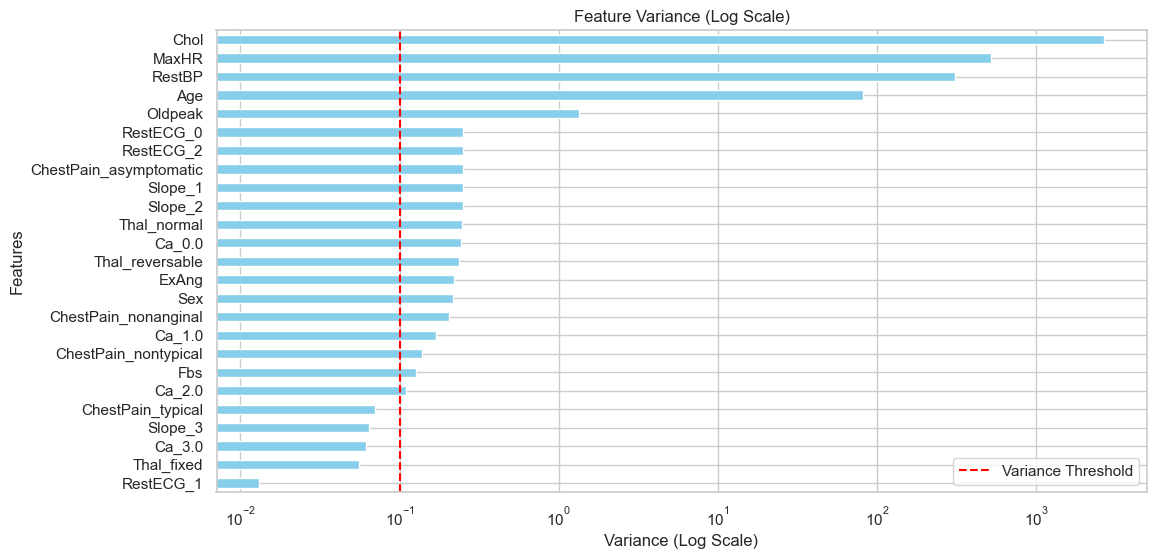

In [28]:
plt.figure(figsize=(12,6))
var_series.sort_values(ascending=True).plot(kind="barh", color="skyblue")
plt.axvline(x=VAR_THRESHOLD, color="red", linestyle="--", label="Variance Threshold")
plt.xscale("log")  
plt.title("Feature Variance (Log Scale)")
plt.xlabel("Variance (Log Scale)")
plt.ylabel("Features")
plt.legend()
plt.show()

### 3.7 Convert Target to Binary  

**Prepare the target variable (AHD) for classification**  

The target column `AHD` is originally categorical with values `"Yes"` and `"No"`.  
Machine learning models require numeric labels, so we convert it into binary integers.  

**Steps performed:**  
- `"Yes"` → 1 (heart disease present),  
- `"No"` → 0 (no heart disease),  
- Ensure the column is stored as integer type.  

**Result:**  
- The target variable `y` is now binary (0/1),  
- Ready for use in supervised classification models.  


In [29]:
y

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
298    Yes
299    Yes
300    Yes
301    Yes
302     No
Name: AHD, Length: 303, dtype: object

In [30]:
y = y.map({"Yes": 1, "No": 0}).astype(int)

In [31]:
y

0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: AHD, Length: 303, dtype: int64

### 3.8 Correlation Threshold Analysis  

**Detect and remove highly correlated features to reduce multicollinearity**  

We examine pairwise correlations among features to avoid redundancy.  
A high correlation threshold of **0.85** is applied.  

**Process:**  
- Generate a correlation heatmap for all features,  
- Identify features exceeding the correlation threshold,  
- Drop those features from the dataset.  

**Findings:**  
- Features removed due to high correlation:  
  - `Thal_reversable`,  
  - `RestECG_2`,  
  - `Slope_2`.  
- Dataset reduced to **17 features**.  

**Insights:**  
Removing highly correlated features reduces the risk of multicollinearity,  
ensuring more stable logistic regression coefficients and improving model interpretability.  


In [32]:
corr_matrix = X_var.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

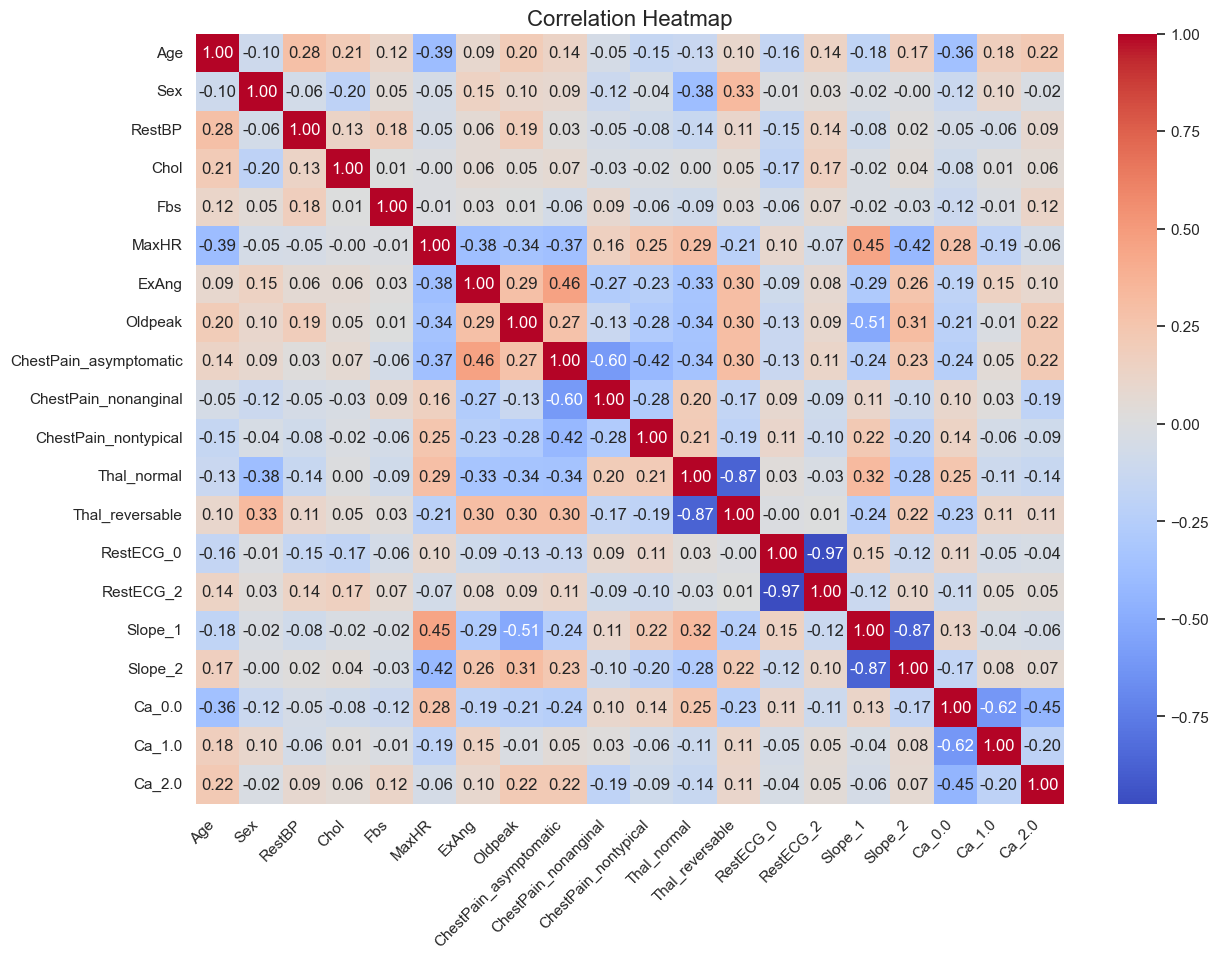

In [33]:
corr_matrix = X_var.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,       
    fmt=".2f",         
    cmap="coolwarm",   
    cbar=True          
)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()

In [34]:
CORR_THRESHOLD = 0.85
to_drop_corr = [col for col in upper.columns if any(upper[col] > CORR_THRESHOLD)]

print(f"Features to drop due to high correlation: {to_drop_corr}")

Features to drop due to high correlation: ['Thal_reversable', 'RestECG_2', 'Slope_2']


In [35]:
X_var = X_var.drop(columns=to_drop_corr)

print("Updated X_var shape:", X_var.shape)
print("Remaining columns:", X_var.columns.tolist())

Updated X_var shape: (303, 17)
Remaining columns: ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'MaxHR', 'ExAng', 'Oldpeak', 'ChestPain_asymptomatic', 'ChestPain_nonanginal', 'ChestPain_nontypical', 'Thal_normal', 'RestECG_0', 'Slope_1', 'Ca_0.0', 'Ca_1.0', 'Ca_2.0']


In [36]:
X_var

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,Thal_normal,RestECG_0,Slope_1,Ca_0.0,Ca_1.0,Ca_2.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
299,68.0,1.0,144.0,193.0,1.0,141.0,0.0,3.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
300,57.0,1.0,130.0,131.0,0.0,115.0,1.0,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
301,57.0,0.0,130.0,236.0,0.0,174.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


## 3.9 Feature Selection Summary  

**Recap of steps taken to refine predictors for modeling**  

Feature selection was carried out in multiple stages to improve data quality  
and ensure robust model performance.  

**1. Initial Dataset Setup**  
- Original dataset contained **13 features**,  
- Several were categorical (e.g., `ChestPain`, `Thal`, `Slope`) and required encoding.  

**2. One-Hot Encoding (Expanding Categories)**  
- Converted categorical variables into dummy columns,  
- Dataset expanded from **13 → 25 features**,  
- Examples:  
  - `ChestPain` → 4 columns,  
  - `Thal` → 3 columns,  
  - `Slope` → 3 columns.  

**3. Variance Threshold Filtering**  
- Goal: remove features with very low variability,  
- Applied **VAR_THRESHOLD = 0.10**,  
- Kept **20 features**, removed **5**:  
  - `ChestPain_typical`, `Thal_fixed`, `RestECG_1`, `Slope_3`, `Ca_3.0`.  

**4. Correlation-Based Filtering**  
- Goal: remove highly correlated features (**threshold = 0.85**),  
- Dropped **3 features**:  
  - `Thal_reversable`, `RestECG_2`, `Slope_2`.  

**Final Result:**  
The dataset was reduced to **17 clean, informative features**,  
optimized for use in classification models.  


## 4. Preprocessing for Modeling  

### 4.1 Split and Scale the Data  

**Prepare training and testing datasets with standardized features**  

Before training models, we split the dataset and apply feature scaling.  

**Steps performed:**  
- Split the dataset into **80% training** and **20% testing**,  
- Use **stratified sampling** to preserve the class balance of the target variable,  
- Apply **StandardScaler** to normalize features:  
  - Fit scaling on training data,  
  - Apply the same transformation to test data.  

**Result:**  
- `X_train_scaled` and `X_test_scaled` contain normalized features,  
- Ensures fair comparison between features of different scales,  
- Prevents data leakage by fitting only on training data.  


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_var, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Modeling  

### 5.1 Logistic Regression (Primary Model)  

**Train and evaluate logistic regression as the baseline classifier**  

We fit a **Logistic Regression** model using the scaled training data,  
then evaluate it on the test set.  

**Results:**  
- **Accuracy:** 0.87  
- **Confusion Matrix:**  
  - True Negatives = 27  
  - False Positives = 6  
  - False Negatives = 2  
  - True Positives = 26  
- **Classification Report:**  
  - Precision (No disease) = 0.93, Recall = 0.82  
  - Precision (Disease) = 0.81, Recall = 0.93  
  - Macro Average = 0.87  
- **ROC AUC Score:** 0.96  

**Insights:**  
- The model achieves high overall accuracy (87%) with strong balance between recall and precision,  
- **Recall for disease cases (0.93)** is particularly important in medical contexts,  
  as it reduces the risk of missing patients with heart disease,  
- Logistic Regression provides a strong and interpretable baseline for comparison  
  with more complex models.  


In [38]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_pred_proba_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nconfusuion matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba_lr))

Logistic Regression Accuracy: 0.8688524590163934

confusuion matrix:
 [[27  6]
 [ 2 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61

ROC AUC Score: 0.9556277056277056


### 5.2 ROC Curve for Logistic Regression  

**Visualize model performance across classification thresholds**  

The ROC curve shows the trade-off between the **True Positive Rate (Recall)**  
and the **False Positive Rate** across different threshold settings.  

**Results:**  
- The ROC curve rises steeply towards the top-left corner,  
- **AUC = 0.96**, confirming excellent model discrimination ability.  

**Insights:**  
- A high AUC indicates that Logistic Regression is effective at distinguishing  
  between patients with and without heart disease,  
- This strengthens confidence in the model as a baseline classifier.  


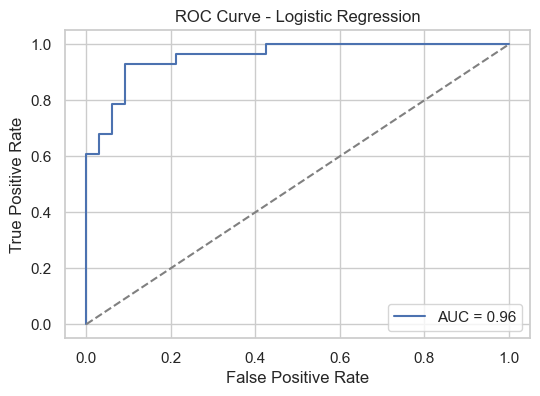

In [39]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba_lr):.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

### 5.3 Training vs Test Accuracy (Overfitting Check)  

**Compare model accuracy on training and test sets**  

We evaluate whether the Logistic Regression model generalizes well  
by comparing its performance on training vs test data.  

**Results:**  
- **Training Accuracy:** 0.856  
- **Test Accuracy:** 0.869  

**Insights:**  
- Training and test accuracies are very close,  
- This indicates the model is **not overfitting**,  
- Logistic Regression maintains consistent performance on unseen data,  
  supporting its reliability as a baseline classifier.  


In [40]:
print("=== Training vs Test Accuracy ===")
print("Logistic Regression Train Accuracy:", log_reg.score(X_train_scaled, y_train))
print("Logistic Regression Test Accuracy :", log_reg.score(X_test_scaled, y_test))
print("-" * 60)


=== Training vs Test Accuracy ===
Logistic Regression Train Accuracy: 0.8553719008264463
Logistic Regression Test Accuracy : 0.8688524590163934
------------------------------------------------------------


### 5.4 Cross-Validation (Model Stability)  

**Evaluate model robustness using k-fold cross-validation**  

We apply **5-fold cross-validation** on the training data  
to test how well Logistic Regression generalizes across different splits.  

**Results:**  
- CV Scores = [0.939, 0.796, 0.833, 0.854, 0.792],  
- **Mean CV Accuracy:** 0.843.  

**Insights:**  
- Cross-validation shows consistent performance across folds,  
- Minor fluctuations suggest slight sensitivity to data splits,  
- Overall, the Logistic Regression model demonstrates **stable and reliable performance**,  
  confirming it as a strong baseline.  


In [41]:

print("\n=== Cross-Validation Scores ===")
log_cv = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)

print(f"Logistic Regression CV Scores: {log_cv}")
print(f"Logistic Regression Mean CV Accuracy: {log_cv.mean():.4f}")
print("-" * 60)




=== Cross-Validation Scores ===
Logistic Regression CV Scores: [0.93877551 0.79591837 0.83333333 0.85416667 0.79166667]
Logistic Regression Mean CV Accuracy: 0.8428
------------------------------------------------------------


### 5.5 Confusion Matrix Heatmap (Visual)  

**Visualize classification performance for Logistic Regression**  

The confusion matrix provides a visual breakdown of predictions:  

- **True Negatives (0 → 0):** 27  
- **False Positives (0 → 1):** 6  
- **False Negatives (1 → 0):** 2  
- **True Positives (1 → 1):** 26  

**Insights:**  
- Most predictions are correct, with a balanced trade-off between classes,  
- Few false negatives (2), meaning the model rarely misses patients with heart disease,  
- Slightly more false positives (6), but this is acceptable in medical contexts  
  since false alarms are less dangerous than missed diagnoses.  


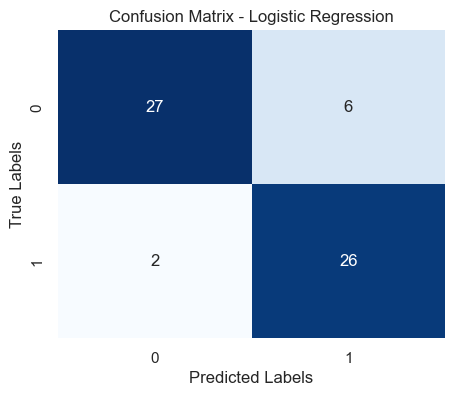

In [42]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")

### 5.6 Additional Metrics: Specificity & Log Loss  

**Extend evaluation with medical-relevant metrics**  

Beyond accuracy, precision, and recall, we calculate:  

- **Specificity (True Negative Rate, TNR):**  
  Measures how well the model identifies patients **without** heart disease.  
  - Logistic Regression Specificity = **0.82**  
  - Interpretation: 82% of healthy patients were correctly classified as not having heart disease.  

- **Log Loss:**  
  Evaluates prediction confidence by penalizing incorrect but confident predictions.  
  - Logistic Regression Log Loss = **0.29**  
  - Interpretation: The model outputs well-calibrated probability estimates.  

**Insights:**  
- The model strikes a good balance:  
  - **High Recall (0.93)** → very few missed disease cases,  
  - **Good Specificity (0.82)** → avoids excessive false alarms,  
- Low **Log Loss (0.29)** confirms that probability predictions are reliable,  
- These metrics reinforce Logistic Regression as a strong, interpretable baseline model for medical diagnosis.  


In [43]:
def calc_specificity(y_true, y_pred):
    """
    Specificity (TNR) = TN / (TN + FP)
    """
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape != (2, 2):
        raise ValueError("Specificity is defined for binary classification. Got confusion matrix shape: "
                         f"{cm.shape}")
    tn, fp, fn, tp = cm.ravel()
    denom = (tn + fp)
    return np.nan if denom == 0 else tn / denom

def metrics_summary(y_true, y_pred, y_proba, model_name="Logistic Regression"):
    """
    Builds a concise summary with Specificity and Log Loss.
    Pass predicted probabilities for the positive class in y_proba.
    """
    summary = {
        "Model": model_name,
        "Specificity (TNR)": calc_specificity(y_true, y_pred),
        "Log Loss": log_loss(y_true, y_proba)
    }
    return pd.DataFrame([summary])

# ---- Use with your existing LR outputs ----
# Assumes you already have: y_test, y_pred_lr, y_pred_proba_lr

lr_summary = metrics_summary(
    y_true=y_test,
    y_pred=y_pred_lr,
    y_proba=y_pred_proba_lr,
    model_name="Logistic Regression"
)

print(lr_summary.to_string(index=False))


              Model  Specificity (TNR)  Log Loss
Logistic Regression           0.818182  0.294059


## 6.0 Logistic Regression Summary  

Logistic Regression served as the **primary baseline model** for predicting heart disease.  
Across all evaluations, it delivered strong and balanced performance:  

- **Accuracy:** 0.87  
- **Precision/Recall:** High recall for disease cases (0.93) while keeping strong precision (0.81),  
- **AUC:** 0.96 → excellent discrimination ability,  
- **Overfitting Check:** Training (0.86) vs Test (0.87) accuracy nearly identical → no overfitting,  
- **Cross-Validation:** Stable mean CV accuracy of 0.84 across folds,  
- **Specificity:** 0.82 → correctly identifies healthy patients most of the time,  
- **Log Loss:** 0.29 → reliable probability calibration,  
- **Confusion Matrix:** Few false negatives (2) and acceptable false positives (6).  

**Key Takeaways:**  
- Logistic Regression provides a strong and interpretable baseline,  
- Its balance of **high recall** (catching disease cases) and **solid specificity** (avoiding false alarms) makes it well-suited for medical applications,  
- Results confirm it as a reliable model. 
